<a href="https://colab.research.google.com/github/zelal-Eizaldeen/project2_Walmart_Price_Prediction/blob/main/project3_3113_zelalae2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Section 1: Technical Details and Performance Metrics



## Technical Details of the Sentiment Classification Model

Our sentiment classification model utilizes **Logistic Regression** with **Elastic Net regularization** to predict the sentiment of movie reviews. Below are the key components and steps involved in the model&rsquo;s implementation, ensuring reproducibility:


### Data Preprocessing:

-   **HTML Removal**:: Employed \`BeautifulSoup\` to strip HTML tags from raw review texts, ensuring only meaningful textual content is processed.

-   **Non-letter Character Removal**:: Utilized regular expressions (\`re\` module) to eliminate all non-alphabetic characters, retaining only letters to reduce noise and focus on relevant textual information.

-   **Lowercasing and Tokenization**:: Converted all text to lowercase and split reviews into individual words (tokens) to maintain consistency and enhance model effectiveness.

-   **Stopword Removal**:: Removed common English stopwords using NLTK&rsquo;s \`stopwords\` corpus. This step eliminates words that do not contribute significantly to sentiment analysis, such as &ldquo;the,&rdquo; &ldquo;is,&rdquo; and &ldquo;and.&rdquo;



### Model Implementation:

-   **Algorithm**:: Implemented Logistic Regression with Elastic Net regularization (\`penalty=&rsquo;elasticnet&rsquo;\`) to balance between L1 and L2 regularization (\`l1<sub>ratio</sub>=0\`). This configuration primarily employs Ridge Regression (L2) to handle multicollinearity and prevent overfitting.

-   **Solver**:: Selected the &rsquo;saga&rsquo; solver, which is efficient for large datasets and supports Elastic Net regularization.

-   **Hyperparameters**::
    -   \`C=5\`:: Inversely proportional to regularization strength.
    -   \`max<sub>iter</sub>=1000\`:: Sets the maximum number of iterations.
    -   \`random<sub>state</sub>=42\`:: Ensures reproducibility.

-   **Training**:: The model was trained on the preprocessed and vectorized training data, learning to associate feature patterns with sentiment labels.



### Prediction and Evaluation:

-   **Prediction**:: After training, the model predicts the probability of each review belonging to the positive sentiment class.

-   **Evaluation Metric**:: Utilized the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) to assess the model&rsquo;s performance.


## Performance Metrics

The model was evaluated across five distinct data splits with the following results:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">Split</th>
<th scope="col" class="org-right">AUC Score</th>
<th scope="col" class="org-left">Execution Time</th>
</tr>
</thead>
<tbody>
<tr>
<td class="org-right">1</td>
<td class="org-right">0.987140</td>
<td class="org-left">12.71 seconds</td>
</tr>

<tr>
<td class="org-right">2</td>
<td class="org-right">0.986762</td>
<td class="org-left">12.59 seconds</td>
</tr>

<tr>
<td class="org-right">3</td>
<td class="org-right">0.986423</td>
<td class="org-left">12.72 seconds</td>
</tr>

<tr>
<td class="org-right">4</td>
<td class="org-right">0.986954</td>
<td class="org-left">12.51 seconds</td>
</tr>

<tr>
<td class="org-right">5</td>
<td class="org-right">0.986348</td>
<td class="org-left">12.66 seconds</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-right">Average</td>
<td class="org-right">0.986665</td>
<td class="org-left">12.64 seconds</td>
</tr>
</tbody>
</table>

**Average AUC:** 0.986665


<a id="org651136a"></a>

## Computer System Specifications

The model was trained and evaluated on the following hardware setup:

-   **System**:: Darwin (macOS)
-   **Processor**:: ARM-based architecture
-   **Physical Cores**:: 14
-   **Total Memory**:: 36.0 GB


<a id="org7f3fcf8"></a>

# Section 2: Interpretability Approach

To elucidate how our Logistic Regression model arrives at its sentiment predictions, we employed **LIME (Local Interpretable Model-agnostic Explanations)** alongside **Global Interpretability** techniques.


<a id="orgeef9ef7"></a>

## Objective

-   **Local Interpretability**:: While the model achieves high overall performance, it&rsquo;s essential to comprehend the rationale behind individual predictions.

-   **Global Interpretability**:: Understanding the overall influence of features (words/phrases) on the model&rsquo;s predictions to gain insights into its decision-making process.


<a id="org2c84e3c"></a>

## Implementation Steps


<a id="orge01dbb2"></a>

### Local Interpretability with LIME

-   **Selection of Reviews**:: Chose 5 positive and 5 negative reviews from the test set to analyze.

-   **Model-Agnostic Explanation**::
    -   **Perturbation**:: LIME generates perturbed samples by modifying the original text (e.g., removing or altering words).
    -   **Model Predictions**:: The trained Logistic Regression model predicts sentiment probabilities for these perturbed samples.
    -   **Local Model Training**:: LIME fits a simple, interpretable model to approximate the behavior of the complex model in the vicinity of the instance being explained.
    -   **Feature Importance**:: The weights assigned by the local model indicate the importance of each word or phrase in influencing the sentiment prediction.

-   **Visualization and Highlighting**::
    -   **HTML Reports**:: Generated HTML files that visually represent the contribution of each feature (word/phrase) to the prediction.
    -   **Highlighted Reviews**:: Created HTML versions of the original reviews with the top contributing words highlighted to provide a qualitative understanding of the model&rsquo;s decisions.


<a id="org96c853a"></a>

### Global Interpretability

-   **Feature Importance Analysis**:: Examined the Logistic Regression model&rsquo;s coefficients to identify the most influential words and phrases contributing to positive and negative sentiments.

-   **Visualization**:: Generated bar plots showcasing the top 10 positive and top 10 negative coefficients, providing a clear overview of feature significance across the entire model.


<a id="org1b13821"></a>

## Conclusion

Integrating LIME into our sentiment classification pipeline enhances both local and global interpretability. Local explanations provide transparency for individual predictions, fostering trust and facilitating error analysis. Meanwhile, global interpretability offers a comprehensive understanding of feature influences, guiding future model refinements and ensuring alignment with domain knowledge.

This dual approach underscores our commitment to building reliable, transparent, and accountable machine learning systems.



In [ ]:
# To remove punctuation and numbers
import re
import pandas as pd
import numpy as np
import warnings

#Vis
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm

# Import BeautifulSoup for Removing HTML Markup
from bs4 import BeautifulSoup
# A stop word list from the Python Natural Language Toolkit (NLTK)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize



In [ ]:
# Removing HTML Markup: The BeautifulSoup Package
!pip install BeautifulSoup4

In [ ]:

nltk.download('stopwords')  # Download text data sets, including stop words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Goal
Your goal is to achieve an AUC score of at least 0.986 across all five test data splits.

## Resources:
- Kaggle: https://www.kaggle.com/c/word2vec-nlp-tutorial
- What we have tried 1: https://campuswire.com/c/GB46E5679/feed/785

In [ ]:
DATA_DIR='/content/drive/MyDrive/MastersDegree/CS598 PSL/Assignments/Projects/Project3/Data/F24_Proj3_data'

## Part 1 By Zilal

#Logistic Regression


In [ ]:
# Train the final model
def train_logistic(X, y):
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=0.5, #means just Ridge Regression
        C=5
    )

    model.fit(X, y)
    return model

In [ ]:
# Making Prediction
def predict(X):
    #X = test.drop(columns=['id', 'review'])
    # Predict probabilities for the test data
    y_pred_proba = model.predict_proba(X)[:, 1]  # Probabilities for positive sentiment
    return y_pred_proba


In [ ]:
num_splits=5
for i in range(num_splits):
  train = pd.read_csv(f"{DATA_DIR}/split_{i+1}/train.csv")
  test = pd.read_csv(f"{DATA_DIR}/split_{i+1}/test.csv")


  # Separate features and target
  X_train = train.drop(columns=['id', 'sentiment', 'review'])
  y_train = train['sentiment']
  X_test = test.drop(columns=['id', 'review'])


  # Logistic regression without penalty as baseline
  model = train_logistic(X_train, y_train)
  y_pred_proba = predict(X_train)
  auc_baseline = roc_auc_score(y_train, y_pred_proba)
  print(f"Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.4f}")

  submission = pd.DataFrame({
    'id': test['id'],
    'prob': y_pred_proba
  })

  submission.to_csv(f'{DATA_DIR}/split_{i+1}/mysubmission.csv', index=False)

    # Calculate AUC on the test data
  y_test = pd.read_csv(f'{DATA_DIR}/split_{i+1}/test_y.csv')['sentiment']
  y_pred_proba = predict(X_test)

  test_auc_score = roc_auc_score(y_test, y_pred_proba)
  print(f"Best AUC Score on Test Data: in split {i+1}: {test_auc_score:.4f}")


Baseline Logistic Regression AUC in split 1: 0.9906
Best AUC Score on Test Data: in split 1: 0.9871
Baseline Logistic Regression AUC in split 2: 0.9908
Best AUC Score on Test Data: in split 2: 0.9867
Baseline Logistic Regression AUC in split 3: 0.9910
Best AUC Score on Test Data: in split 3: 0.9864
Baseline Logistic Regression AUC in split 4: 0.9906
Best AUC Score on Test Data: in split 4: 0.9870
Baseline Logistic Regression AUC in split 5: 0.9911
Best AUC Score on Test Data: in split 5: 0.9863


##**Part 2 By Jianci and Messay**

In [ ]:
num_splits=1
for i in range(num_splits):
  train = pd.read_csv(f"{DATA_DIR}/split_{i+1}/train.csv")
  test = pd.read_csv(f"{DATA_DIR}/split_{i+1}/test.csv")


  # Separate features and target
  X_train = train.drop(columns=['id', 'sentiment', 'review'])
  y_train = train['sentiment']
  X_test = test.drop(columns=['id', 'review'])


  # Logistic regression without penalty as baseline
  model = train_logistic(X_train, y_train)
  y_pred_proba = predict(X_train)
  auc_baseline = roc_auc_score(y_train, y_pred_proba)
  print(f"Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.4f}")

  submission = pd.DataFrame({
    'id': test['id'],
    'prob': y_pred_proba
  })

  submission.to_csv(f'{DATA_DIR}/split_{i+1}/mysubmission.csv', index=False)

    # Calculate AUC on the test data
  y_test = pd.read_csv(f'{DATA_DIR}/split_{i+1}/test_y.csv')['sentiment']
  y_pred_proba = predict(X_test)

  test_auc_score = roc_auc_score(y_test, y_pred_proba)
  print(f"Best AUC Score on Test Data: in split {i+1}: {test_auc_score:.4f}")


Baseline Logistic Regression AUC in split 1: 0.9906
Best AUC Score on Test Data: in split 1: 0.9871


In [ ]:
coefficients = model.coef_  # For multi-class models, it's one row per class
importance = np.abs(coefficients).mean(axis=0)  # Aggregate importance for multi-class

# Create a DataFrame for features and their importance
feature_importance = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance['Importance_Percent'] = feature_importance['Importance']/(feature_importance['Importance'].sum())*100

In [ ]:
cor_lst = X_train.corrwith(y_train).sort_values(ascending=False).reset_index()
cor_lst.columns=['Feature', 'Correlation']

In [ ]:
feature_summary = cor_lst.merge(feature_importance, on='Feature', how='left').sort_values(by='Correlation', ascending=False)

In [ ]:
feature_important_list_df = feature_summary[(abs(feature_summary['Correlation']) > 0.3) & (feature_summary['Importance_Percent'] > 0.1)]
feature_important_list = feature_important_list_df['Feature'].tolist()
len(feature_important_list)

54

In [ ]:
#important feature with high correlation with sentiment and prove to be high importance for prediction
feature_important_list_df

,Feature,Correlation,Importance,Importance_Percent
0,embedding_382,0.526130,6.118687,0.322802
1,embedding_778,0.498707,3.167543,0.167109
2,embedding_322,0.439435,6.714929,0.354257
4,embedding_8,0.417342,4.513838,0.238135
6,embedding_673,0.412435,3.354432,0.176969
9,embedding_175,0.390254,2.442639,0.128866
10,embedding_1121,0.384040,3.666646,0.193440
11,embedding_255,0.379023,3.564682,0.188061
12,embedding_1392,0.375066,1.923259,0.101465
15,embedding_637,0.363723,3.611606,0.190536


In [ ]:
# Define a custom tokenizer with lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def lemmatize_tokenizer(text):
    words = text.split()  # Basic split by space
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.

    return( " ".join( meaningful_words ))

In [ ]:
sample_out_put = pd.DataFrame()
sample_word_freq = pd.DataFrame(columns=["feature", 'count', 'word'])
sample_out_put
for index, feature in enumerate(feature_important_list):
  temp = train.sort_values(by=feature_important_list[index], ascending=False)[['sentiment','review', feature_important_list[index]]].head(5)
  temp_train = train.sort_values(by=feature_important_list[index], ascending=False)[['sentiment','review', feature_important_list[index]]].head(500)
  temp['feature'] = feature_important_list[index]
  temp['score'] = temp[feature_important_list[index]]
  temp_total_sentiment = temp['sentiment'].sum()
  if (temp_total_sentiment == 0) | (temp_total_sentiment == 5):
    sample_out_put = pd.concat([sample_out_put , temp[['sentiment','review','feature','score']]], axis = 0)
    #print(temp)


    # Get the number of reviews based on the dataframe column size
    num_reviews = temp_train["review"].size
    print(f"Cleaning and parsing the training set movie reviews for featuer-{feature}...\n")
    # Initialize an empty list to hold the clean reviews
    clean_train_reviews = []
    for j in range( 0, num_reviews ):
      # If the index is evenly divisible by 1000, print a message
      if( (j+1)%100 == 0 ):
        print("Review %d of %d\n" % ( j+1, num_reviews ))
      clean_train_reviews.append( review_to_words( temp_train["review"].iloc[j] ))

    print("Creating the bag of words...\n")

    # Initialize the "CountVectorizer" object, which is scikit-learn's
    # bag of words tool.
    vectorizer = CountVectorizer(analyzer = "word",
                                tokenizer=lemmatize_tokenizer,
                                preprocessor = None,
                                stop_words = None,
                                max_features = 300,
                                ngram_range=(2,3),            # Use 1- to 4-grams
                                min_df=0.001,                       # Minimum term frequency
                                max_df=0.05,                      # Maximum document frequency
                                token_pattern=r"\b[\w+|3']+\b") # Use word tokenizer: See Ethan's comment below; at least len = 3

    # fit_transform() does two functions: First, it fits the model
    # and learns the vocabulary; second, it transforms our training data
    # into feature vectors. The input to fit_transform should be a list of
    # strings.
    train_data_features = vectorizer.fit_transform(clean_train_reviews)

    # Numpy arrays are easy to work with, so convert the result to an
    # array
    train_data_features = train_data_features.toarray()
    # Take a look at the words in the vocabulary
    vocab = vectorizer.get_feature_names_out()

    # Sum up the counts of each vocabulary word
    dist = np.sum(train_data_features, axis=0)

    # For each, print the vocabulary word and the number of times it
    # appears in the training set
    for tag, count in zip(vocab, dist):
      new_row = pd.DataFrame({'feature': feature, 'count': count, 'word': tag}, index=[0])
      sample_word_freq = pd.concat([sample_word_freq, new_row], ignore_index=True)
      print(feature, count, tag)


Streaming output truncated to the last 5000 lines.
embedding_1497 4 bad thing
embedding_1497 6 best film
embedding_1497 8 best friend
embedding_1497 7 best movie
embedding_1497 5 best part
embedding_1497 8 best show
embedding_1497 5 best thing
embedding_1497 5 black woman
embedding_1497 4 bring back
embedding_1497 4 brought back
embedding_1497 5 cannot believe
embedding_1497 5 character really
embedding_1497 5 character show
embedding_1497 7 columbo movie
embedding_1497 8 come back
embedding_1497 5 come true
embedding_1497 4 comic genius
embedding_1497 5 could play
embedding_1497 4 craig morris
embedding_1497 6 david suchet
embedding_1497 5 definitely one
embedding_1497 5 definitely worth
embedding_1497 4 dustin hoffman
embedding_1497 7 eddie izzard
embedding_1497 16 eddie monroe
embedding_1497 5 enjoyed film
embedding_1497 6 entire cast
embedding_1497 4 episode like
embedding_1497 7 episode one
embedding_1497 7 esther rolle
embedding_1497 5 even better
embedding_1497 4 even stupid
emb

In [ ]:
sample_out_put.to_csv(f'{DATA_DIR}/split_{i+1}/sample_out_put.csv', index=False)

In [ ]:
sample_word_freq.to_csv(f'{DATA_DIR}/split_{i+1}/sample_word_freq.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

       sentiment                                             review  \
11384          1  This movie is based on the novel Island of dr....   
4458           1  A very interesting addition to the Scandavian ...   
9655           1  They were alternative before there was alterna...   
20626          1  This TV-series was one of the ones I loved whe...   
19004          1  Still love it 17 or so years after the first t...   

             feature     score  
11384  embedding_382  0.089140  
4458   embedding_382  0.088933  
9655   embedding_382  0.079776  
20626  embedding_382  0.077746  
19004  embedding_382  0.075780  


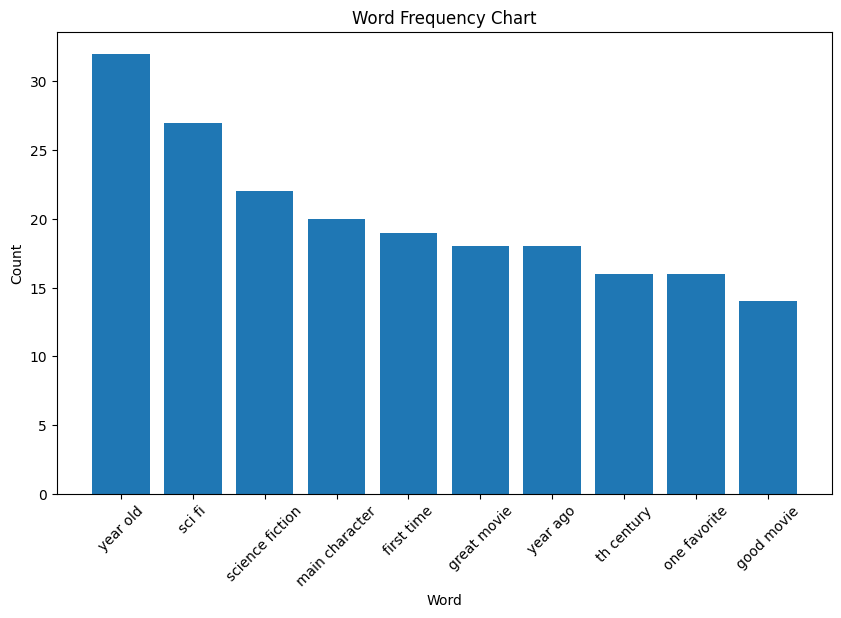

       sentiment                                             review  \
12693          1  Riding Giants is an amazing movie. It really s...   
14132          1  My husband and I just got done watching this m...   
2202           1  This movie is a real thriller! It was exciting...   
13041          1  If you're as huge of a fan of an author as I a...   
18449          1  Sur mes lèvres or READ MY LIPS is fine little ...   

             feature     score  
12693  embedding_778  0.080000  
14132  embedding_778  0.077936  
2202   embedding_778  0.075987  
13041  embedding_778  0.075863  
18449  embedding_778  0.071391  


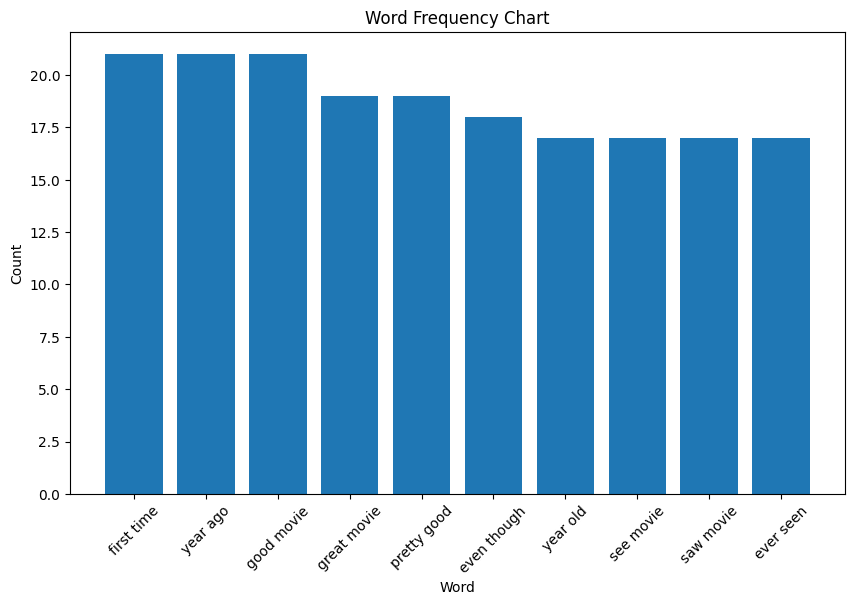

       sentiment                                             review  \
16673          1  First off; I'm a dedicated fan of Modesty's, a...   
17770          1  House of Games is a wonderful movie at multipl...   
2922           1  People have often been uncomfortable with \The...   
22225          1  Bette Midler showcases her talents and beauty ...   
19361          1  Eytan Fox did it again : move the viewer's hea...   

             feature     score  
16673  embedding_322  0.083201  
17770  embedding_322  0.072916  
2922   embedding_322  0.071464  
22225  embedding_322  0.063821  
19361  embedding_322  0.062947  


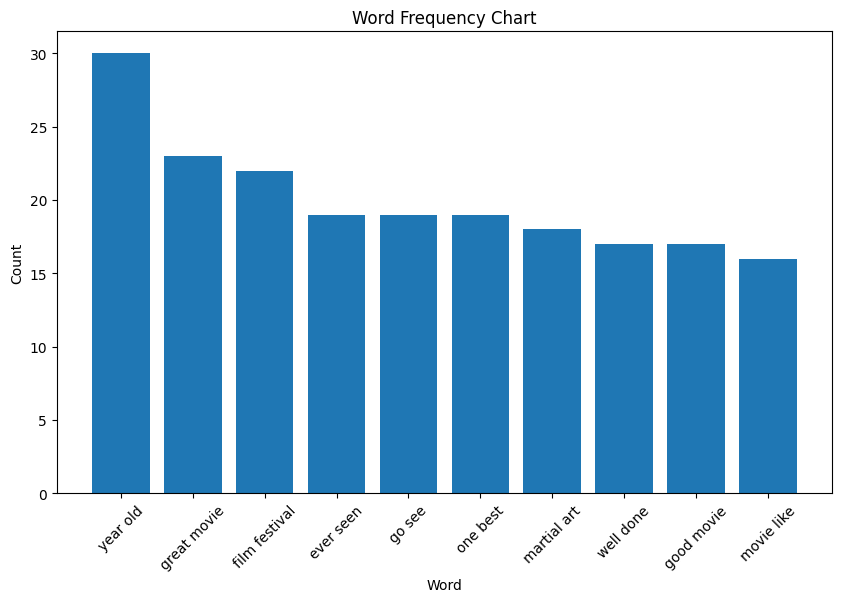

       sentiment                                             review  \
11577          1  I had the opportunity to see this last evening...   
21918          1  I saw this movie first on the Berlin Film Fest...   
7414           1  Wow.this is a touching story! First i saw 'Res...   
20531          1  I just saw this movie today with my children (...   
13985          1  This movie was good for it's time. If you like...   

           feature     score  
11577  embedding_8  0.129063  
21918  embedding_8  0.126889  
7414   embedding_8  0.118099  
20531  embedding_8  0.116007  
13985  embedding_8  0.113102  


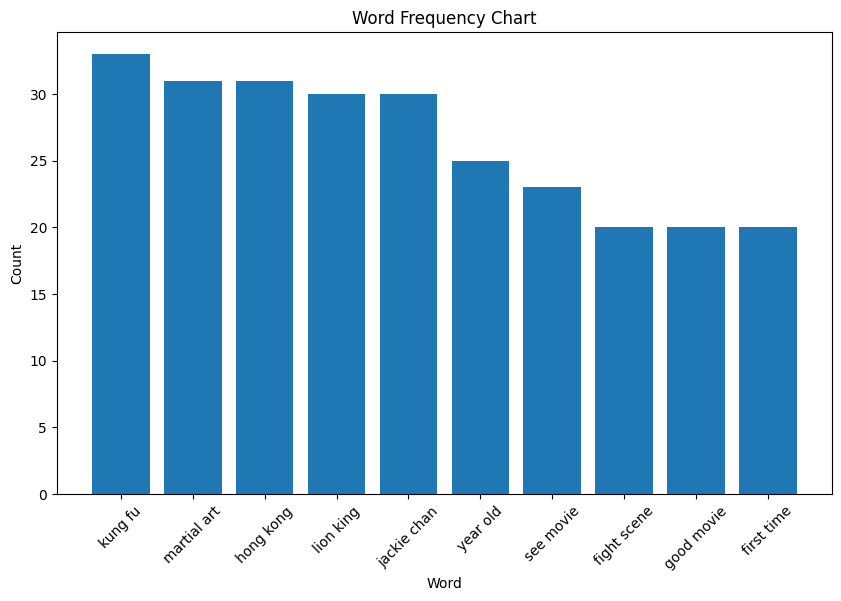

       sentiment                                             review  \
8896           1  I loved this film because of the dialog and su...   
5446           1  'The Big Snit' came into my life complete by a...   
12789          1  Did Sandra (yes, she must have) know we would ...   
18611          1  This is what we can do to each other. This is ...   
5911           1  Of all the major 30s star actresses, Miriam Ho...   

             feature     score  
8896   embedding_673  0.069053  
5446   embedding_673  0.066602  
12789  embedding_673  0.066402  
18611  embedding_673  0.065879  
5911   embedding_673  0.065807  


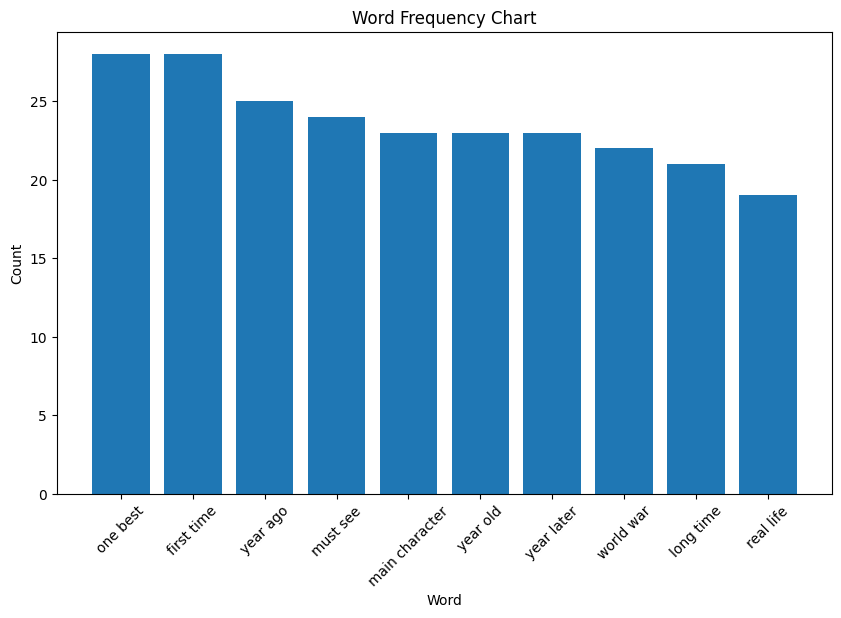

       sentiment                                             review  \
12062          1  Anderson's animation easily rivals that of Pix...   
7706           1  That's right. Ohwon (the painter and the main ...   
5088           1  This film is superb, it has the same low-budge...   
728            1  When I watch a short like Boy-Next-Door, I fin...   
2989           1  Stephen Hawkings is a genius. He is the king o...   

             feature     score  
12062  embedding_175  0.090264  
7706   embedding_175  0.088590  
5088   embedding_175  0.087344  
728    embedding_175  0.085252  
2989   embedding_175  0.085206  


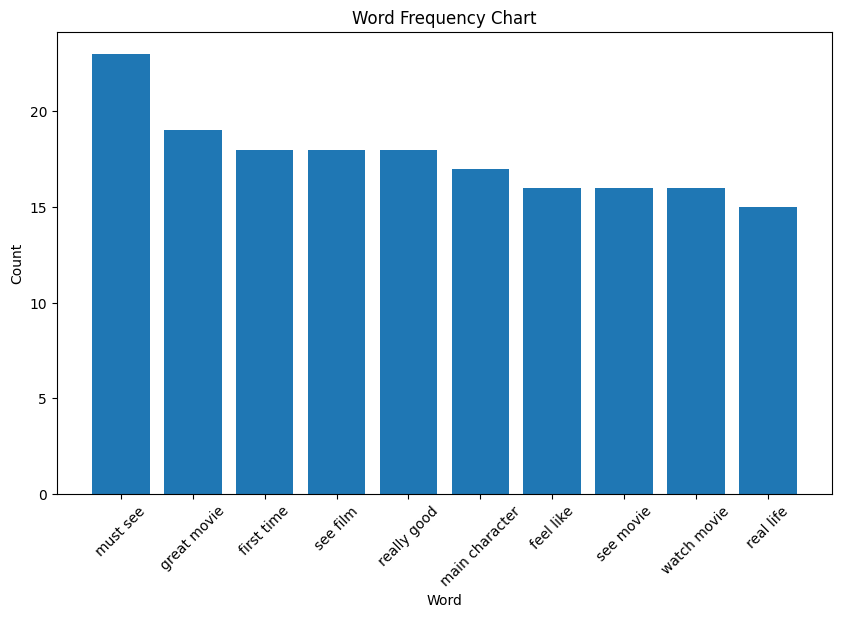

       sentiment                                             review  \
23209          1  I saw \Fever Pitch\" sort of by accident; it w...   
13403          1  Saw this film in August at the 27th Annual Nat...   
3107           1  \Knute Rockne All American\", the biopic about...   
4325           1  The movie shows many feelings and emotions tha...   
15130          1  <br /><br />This movie is by far one of my fav...   

              feature     score  
23209  embedding_1121  0.068312  
13403  embedding_1121  0.067819  
3107   embedding_1121  0.061666  
4325   embedding_1121  0.059747  
15130  embedding_1121  0.058393  


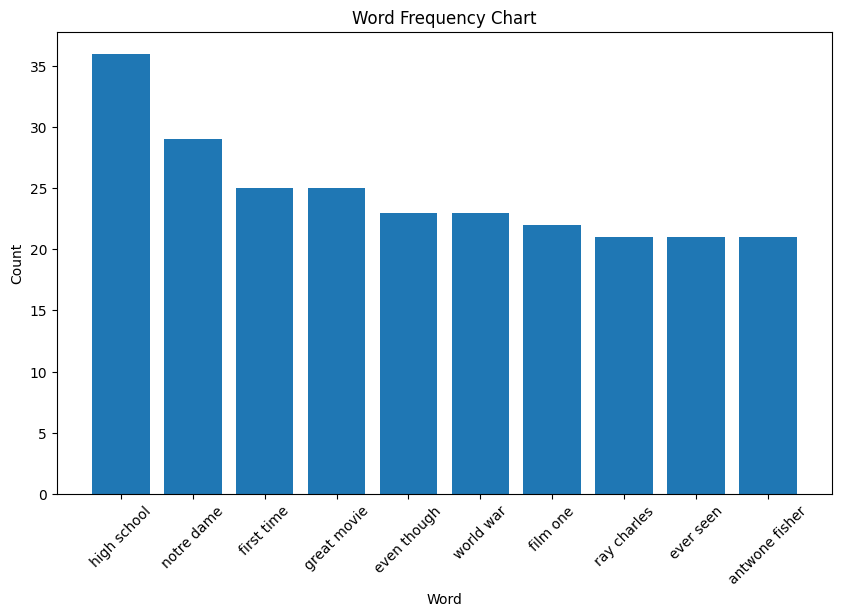

       sentiment                                             review  \
8650           1  Keys to the VIP, an original series by the Can...   
13755          1  \Lost\", \"24\", \"Carnivale\", \"Desperate Ho...   
23848          1  \Girlfight\" follows a project dwelling New Yo...   
21690          1  To Die For has it all.This film has a great ca...   
5979           1      Film auteur Stephan Woloszczuk explores th...   

             feature     score  
8650   embedding_255  0.082209  
13755  embedding_255  0.069449  
23848  embedding_255  0.063882  
21690  embedding_255  0.061383  
5979   embedding_255  0.061190  


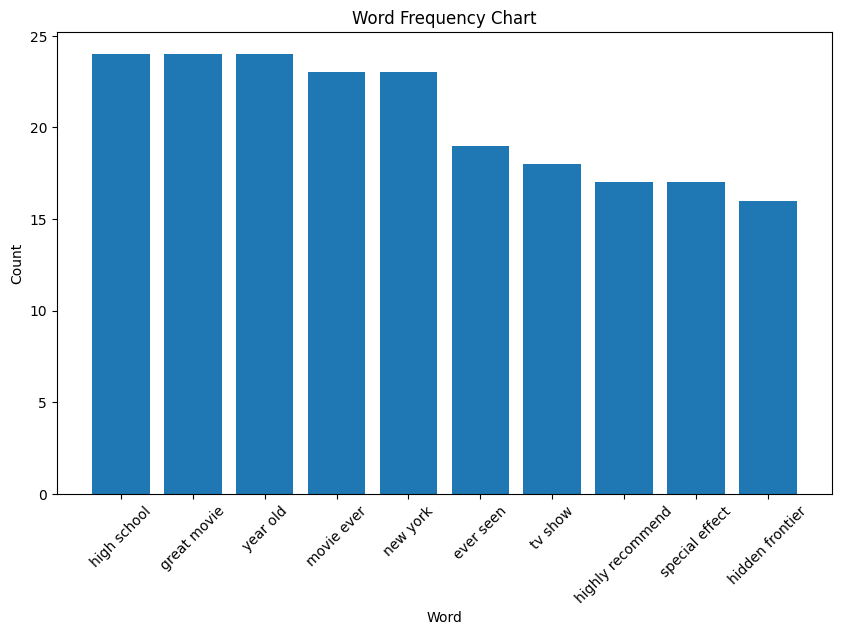

       sentiment                                             review  \
21535          1  I watched this film over a hundred times. It i...   
9491           1  I loved this movie it was a great portrayal of...   
8067           1  Latcho Drom is a cinematic survey of Gypsy mus...   
10637          1  Great story, great music. A heartwarming love ...   
16432          1  This outstanding Argentine independent film is...   

              feature     score  
21535  embedding_1392  0.069014  
9491   embedding_1392  0.066944  
8067   embedding_1392  0.061054  
10637  embedding_1392  0.060693  
16432  embedding_1392  0.059815  


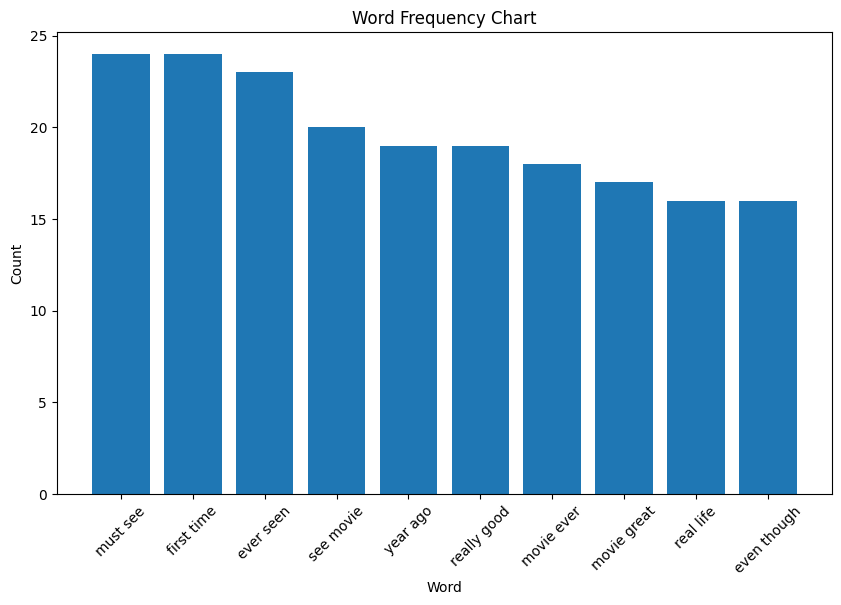

       sentiment                                             review  \
21474          1  Dear Readers,<br /><br />The final battle betw...   
15842          1  Academy Award winner Robert Redford (Best Dire...   
16334          1  I lost my father at a very young age.So young ...   
22115          1  When \Good Times\" premiered in 1974, it was o...   
15951          1  This may just be the most nostalgic journey ba...   

             feature     score  
21474  embedding_637  0.061819  
15842  embedding_637  0.056415  
16334  embedding_637  0.054058  
22115  embedding_637  0.052549  
15951  embedding_637  0.051486  


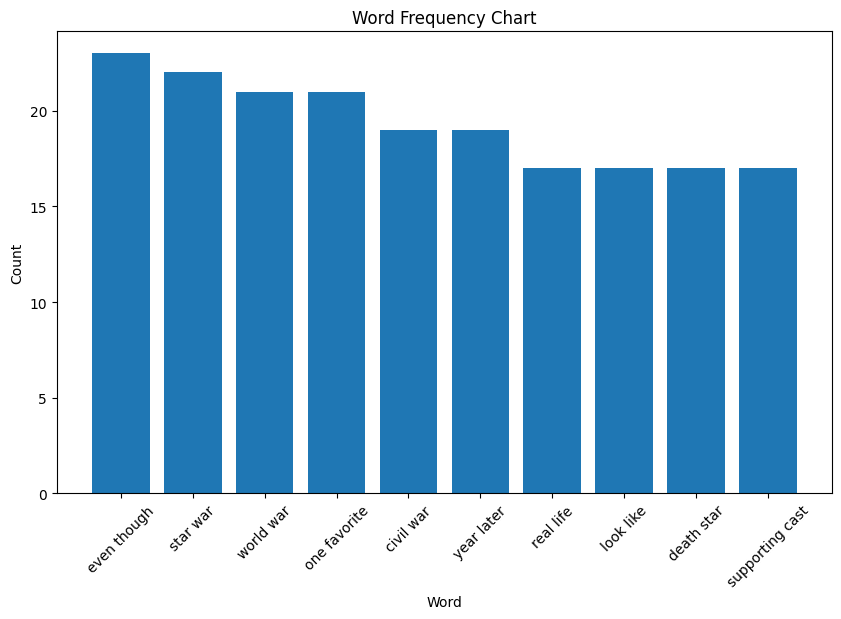

       sentiment                                             review  \
5430           1  Horses on Mars is an engaging animated short t...   
8979           1  A great movie about triumph over all the nay-s...   
8687           1  This is a beautifully filmed movie that questi...   
12074          1  As an adventure mini-series, this is about as ...   
18051          1  White man + progress + industrialization = BAD...   

             feature     score  
5430   embedding_560  0.095940  
8979   embedding_560  0.094626  
8687   embedding_560  0.090855  
12074  embedding_560  0.088864  
18051  embedding_560  0.087204  


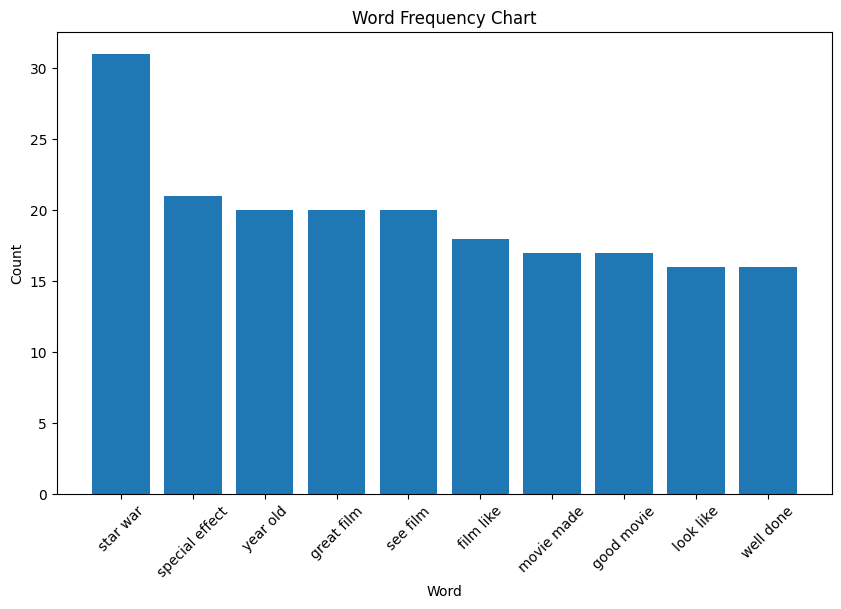

       sentiment                                             review  \
1652           1  First of all, I have watched this show since I...   
12305          1  I viewed my videotape last night, for the firs...   
24515          1  seriously i loved this film..i had started to ...   
9069           1  A delightful story about two evacuees, has bee...   
15568          1  I'm a fan of TV movies in general and this was...   

              feature     score  
1652   embedding_1187  0.073943  
12305  embedding_1187  0.073926  
24515  embedding_1187  0.070537  
9069   embedding_1187  0.070103  
15568  embedding_1187  0.069425  


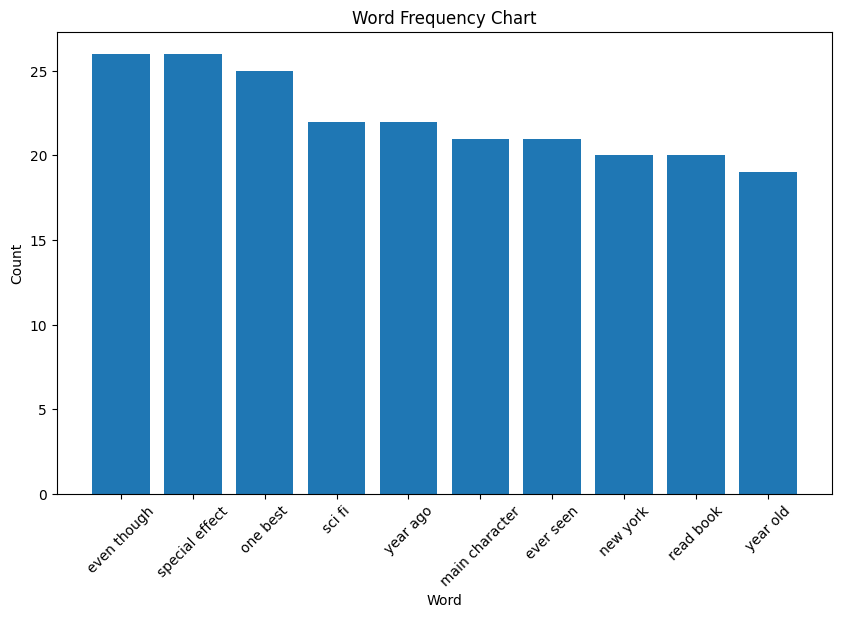

       sentiment                                             review  \
4998           1  \House Calls\" is a wonderful romantic comedy ...   
17943          1  Hardcastle and McCormick is an excellent TV sh...   
12134          1  ...the last time I laughed this much. It's a t...   
24927          1  Has there ever been a movie more charming than...   
15492          1  I took a chance on \Hardcastle and McCormick\"...   

              feature     score  
4998   embedding_1082  0.069380  
17943  embedding_1082  0.069020  
12134  embedding_1082  0.068832  
24927  embedding_1082  0.068488  
15492  embedding_1082  0.068475  


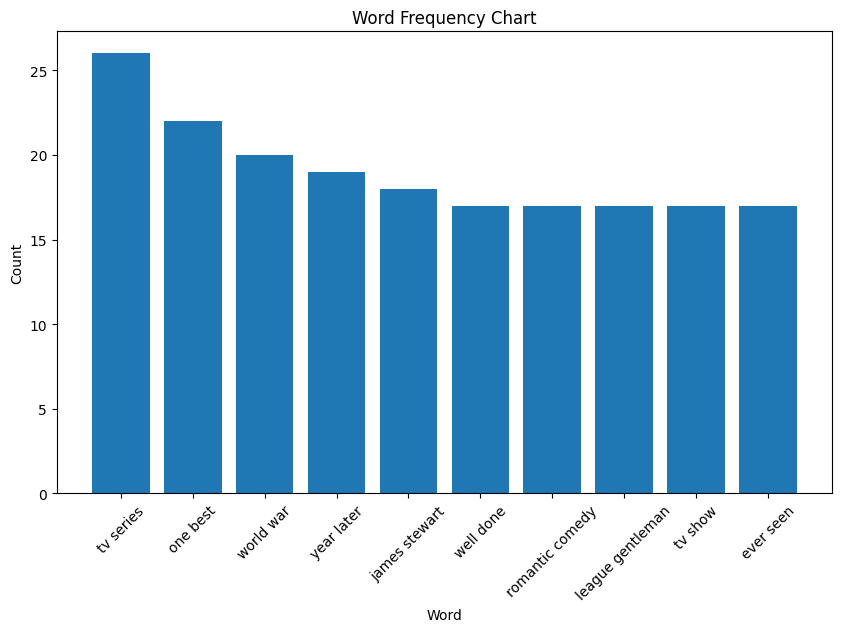

       sentiment                                             review  \
11177          1  When the Bicentennial hit, I was in Hershey, P...   
6389           1  OhMyGAWD!!! THE MAGIC GARDEN is perhaps one of...   
133            1  While it comes no closer to the Tarzan of Edga...   
14897          1  The alternate title of Ecstasy, is Symphony of...   
21291          1  With various Bogdanoviches and Gazzaras scatte...   

             feature     score  
11177  embedding_456  0.101229  
6389   embedding_456  0.084473  
133    embedding_456  0.081069  
14897  embedding_456  0.075336  
21291  embedding_456  0.073602  


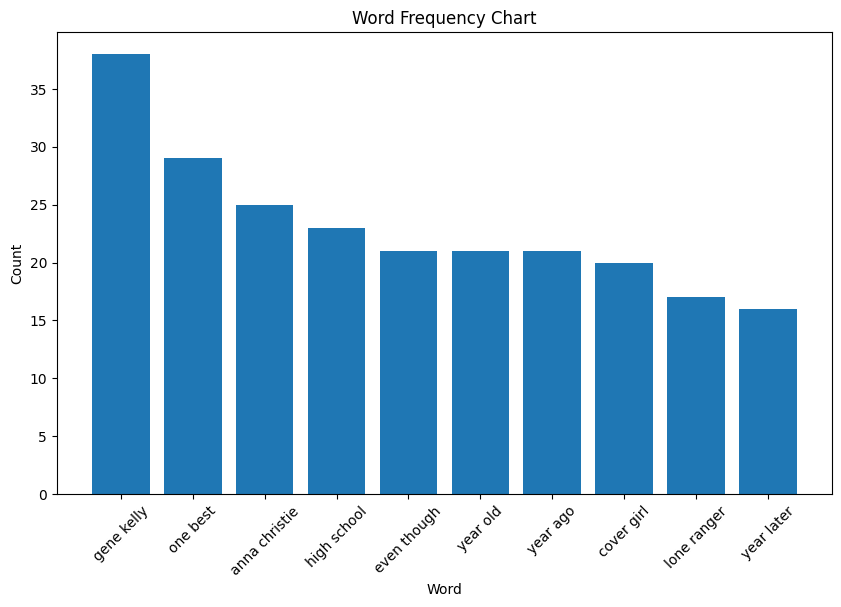

       sentiment                                             review  \
19049          1  <br /><br />Film dominated by raven-haired Bar...   
14362          1  I remember watching American Gothic when it fi...   
13701          1  In the very first episode of Friends, which ai...   
23439          1  This series was a cut above the rest of the TV...   
859            1  Undoubtedly one of the best episodes ever, Bal...   

             feature     score  
19049  embedding_622  0.060918  
14362  embedding_622  0.060497  
13701  embedding_622  0.060166  
23439  embedding_622  0.057771  
859    embedding_622  0.056590  


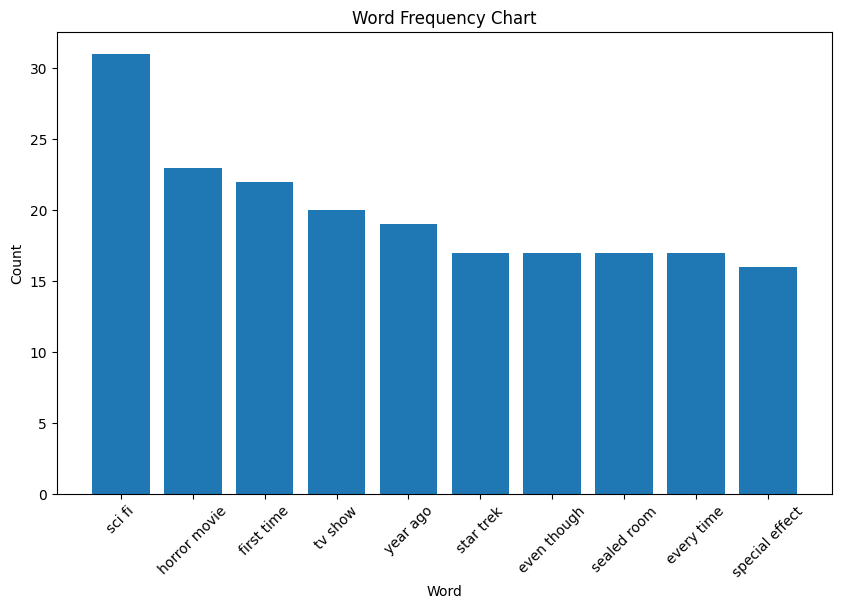

       sentiment                                             review  \
11666          1  Sarah Plain and Tall's Winters end was the bes...   
14439          1  'The Rookie' was a wonderful movie about the s...   
20547          1  This is one of the most calming, relaxing, and...   
707            1  the most \spiritual\" film I have seen in a lo...   
11123          1  Jäniksen vuosi is one of Jarva's most politica...   

             feature     score  
11666  embedding_536  0.125773  
14439  embedding_536  0.104298  
20547  embedding_536  0.098749  
707    embedding_536  0.091280  
11123  embedding_536  0.089146  


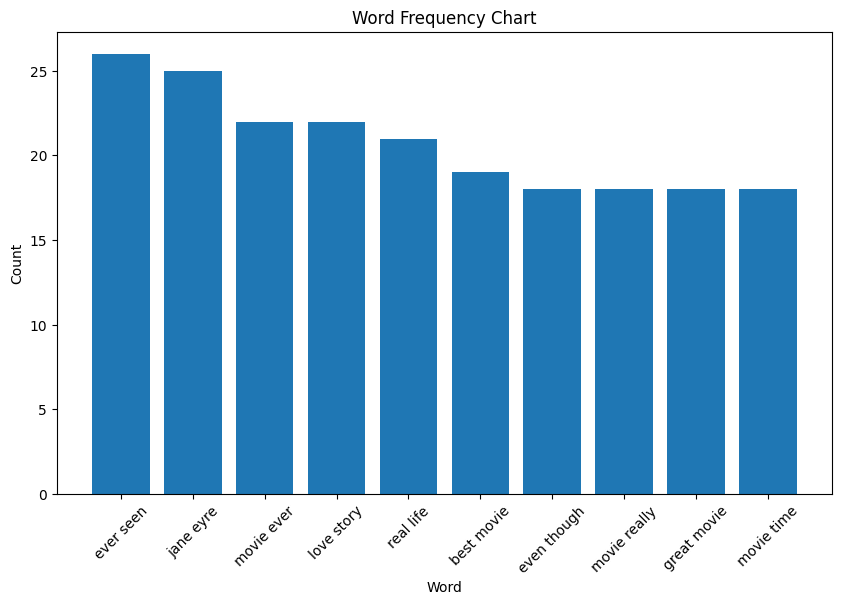

       sentiment                                             review  \
13448          1  Does anyone know, where I can see or download ...   
8895           1  Add this little gem to your list of holiday re...   
22676          1  79/100. Fred Astaire and Ginger Rogers never m...   
13084          1  this was a fantastic episode. i saw a clip fro...   
20846          1  Another fun, witty, frothy RKO musical with As...   

             feature     score  
13448  embedding_487  0.091564  
8895   embedding_487  0.085054  
22676  embedding_487  0.084644  
13084  embedding_487  0.084327  
20846  embedding_487  0.082829  


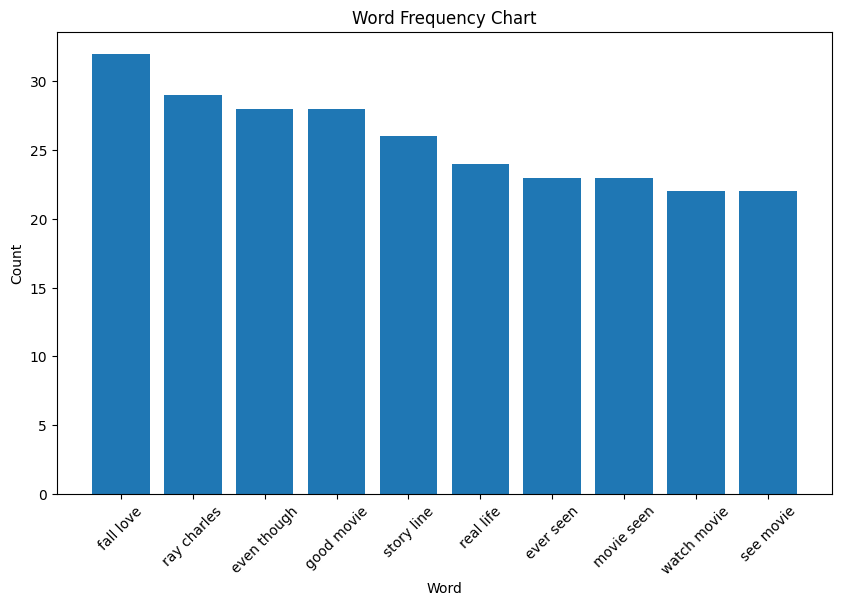

       sentiment                                             review  \
9444           1  A fun filled romp, full of silly if not someti...   
11436          1  I liked it better than House Party 2 & 3. The ...   
11768          1  This is one of the best horror / suspense film...   
6234           1  \Curse of Monkey Island\" is a treasure; in my...   
665            1  I first saw this on the big screen with my gir...   

              feature     score  
9444   embedding_1149  0.069561  
11436  embedding_1149  0.062494  
11768  embedding_1149  0.058242  
6234   embedding_1149  0.058112  
665    embedding_1149  0.057109  


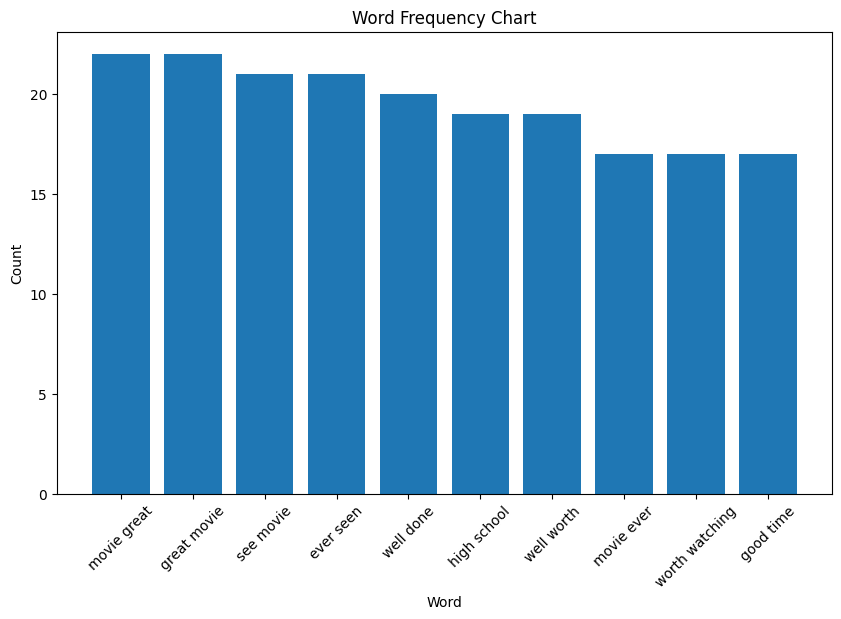

       sentiment                                             review  \
12753          1  This is a truly classic movie in its story, ac...   
951            1  This is one of the best films I've seen in the...   
21718          1  Paris, JE T'AIME is a wondrous cinematic homag...   
24197          1  Paris is the place to be to enjoy beautiful ar...   
20505          1  This is a wonderful film. The non-stop patter ...   

            feature     score  
12753  embedding_19  0.117055  
951    embedding_19  0.101419  
21718  embedding_19  0.100071  
24197  embedding_19  0.095772  
20505  embedding_19  0.093807  


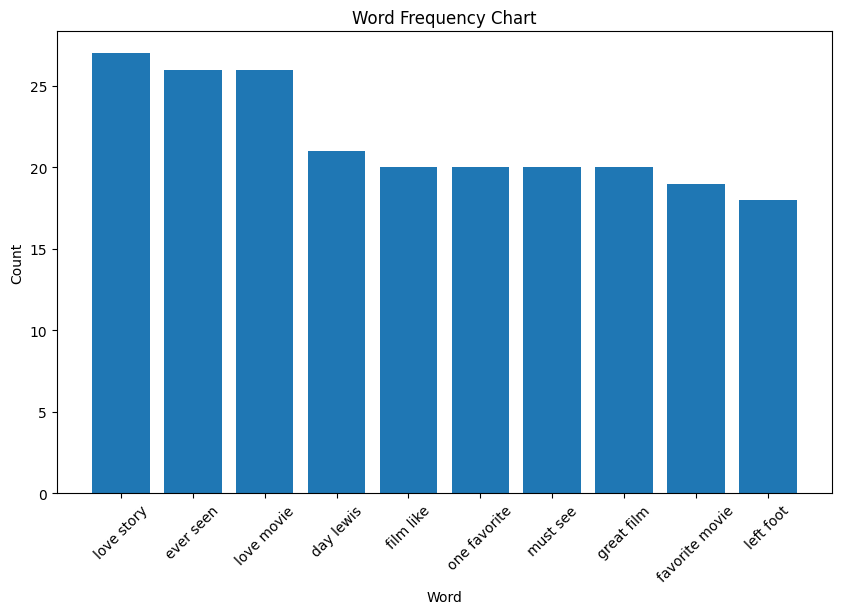

       sentiment                                             review  \
21674          1  Full House is a wonderful sitcom that is about...   
19801          1  Eddie Izzard is genius with his non-stop humor...   
16363          1  Back in 74 Eric Monte made the classic T.V sho...   
16171          1  LOL!!! delirious was so funny.. i was in tears...   
11708          1  After watching the series premiere of Talk Sho...   

              feature     score  
21674  embedding_1497  0.069037  
19801  embedding_1497  0.062414  
16363  embedding_1497  0.060301  
16171  embedding_1497  0.059153  
11708  embedding_1497  0.056595  


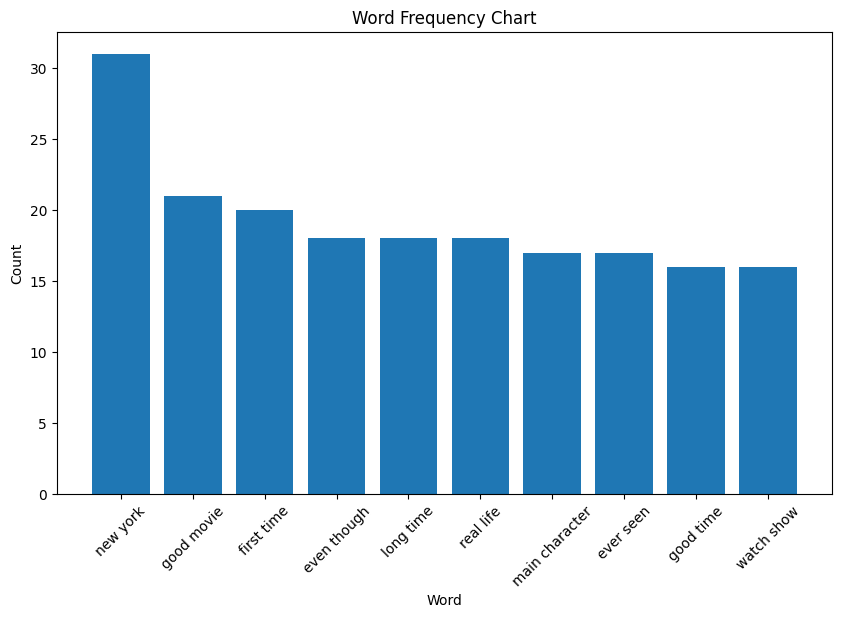

       sentiment                                             review  \
4756           1  The Western can be divided into many sub-genre...   
1646           1  I caught this on local Mexican television at 2...   
15349          1  A fine western, following the fate of those wh...   
14534          1  Gene Tierney and Dana Andrews, who were both s...   
13924          1  I usually steer clear of TV movies because of ...   

            feature     score  
4756   embedding_59  0.123873  
1646   embedding_59  0.123795  
15349  embedding_59  0.122423  
14534  embedding_59  0.119633  
13924  embedding_59  0.119156  


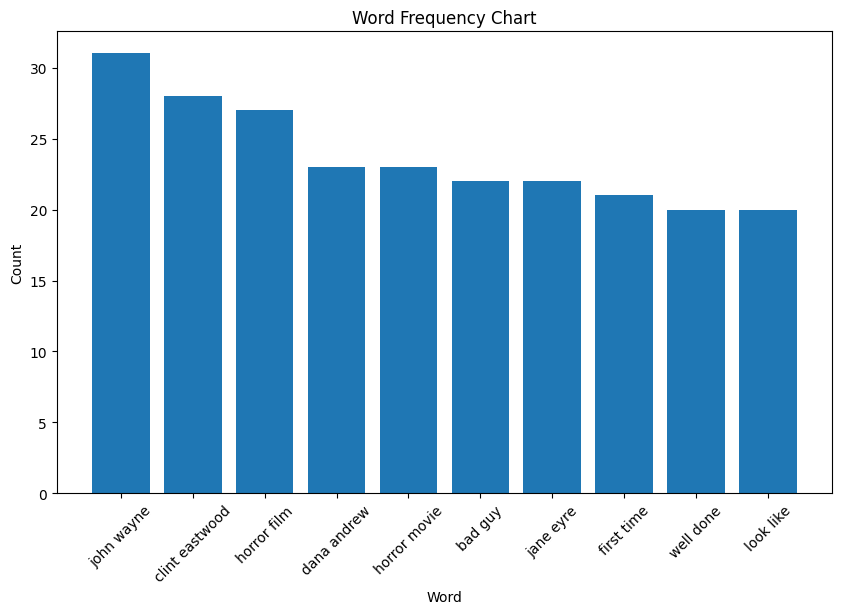

       sentiment                                             review  \
17721          1  myself and 2 sisters watched all 3 series of T...   
10545          1  This young filmmaker has a talent for capturin...   
20336          1  The French Naudet brothers did something nobod...   
9272           1  I think that this short TV series, was absolut...   
8903           1  I watched this film early 70's.It is the best ...   

             feature     score  
17721  embedding_276  0.074794  
10545  embedding_276  0.073893  
20336  embedding_276  0.072395  
9272   embedding_276  0.068377  
8903   embedding_276  0.067096  


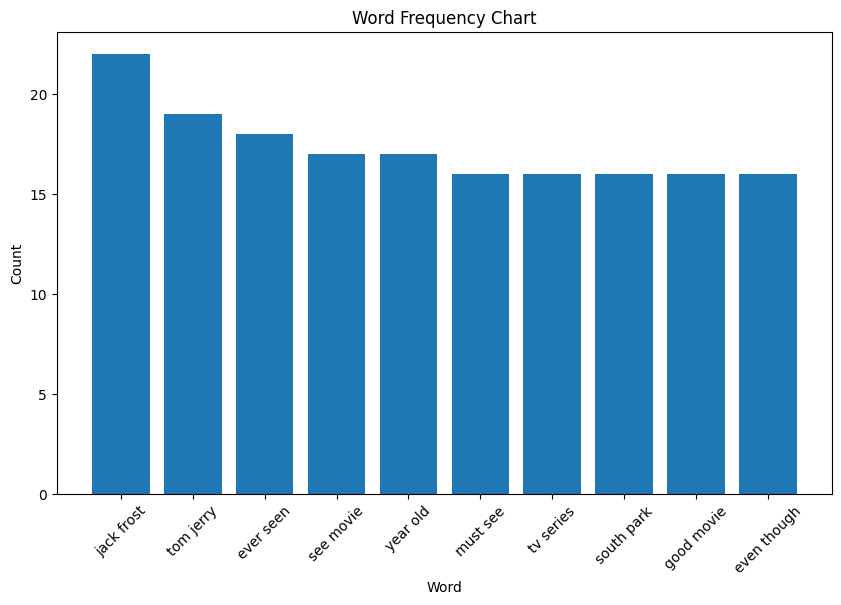

       sentiment                                             review  \
602            0  Killjoy 2 surpasses the first movie by just a ...   
15553          0  I wanted to give Drawing Blood the benefit of ...   
1936           0  A brilliant professor and his sidekick journey...   
23364          0  Well...tremors I, the original started off in ...   
22705          0  The last reviewer was very generous. I quiet l...   

              feature     score  
602    embedding_1299  0.094160  
15553  embedding_1299  0.092676  
1936   embedding_1299  0.088241  
23364  embedding_1299  0.084993  
22705  embedding_1299  0.083697  


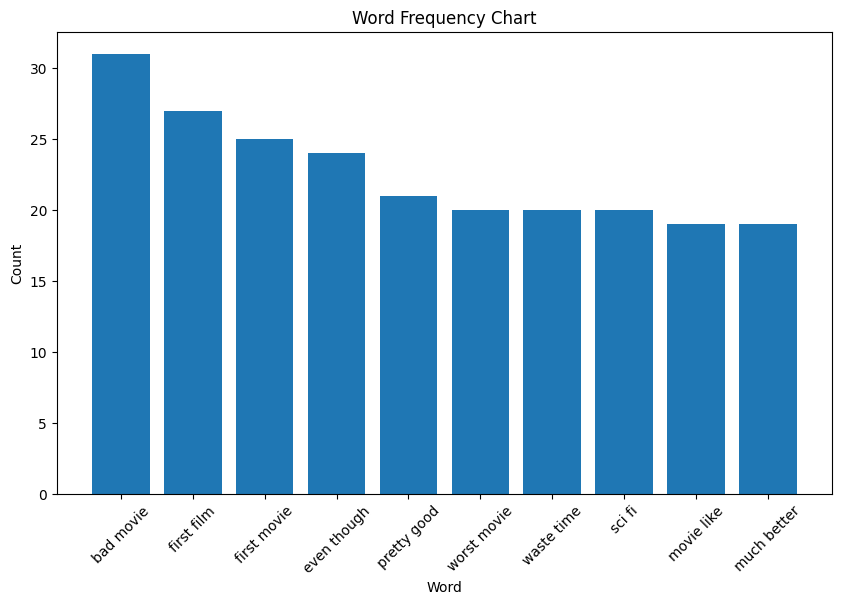

       sentiment                                             review  \
12558          0  What happens when an army of wetbacks, towelhe...   
2438           0  Another movie with a star of a wrestling. So f...   
4412           0  I will never go to another Tarantino movie aga...   
5587           0  This movie changes its way a third of the way ...   
4557           0  Some weeks ago, at a movie theater, I saw a mo...   

             feature     score  
12558  embedding_600  0.079664  
2438   embedding_600  0.074139  
4412   embedding_600  0.073577  
5587   embedding_600  0.072725  
4557   embedding_600  0.068983  


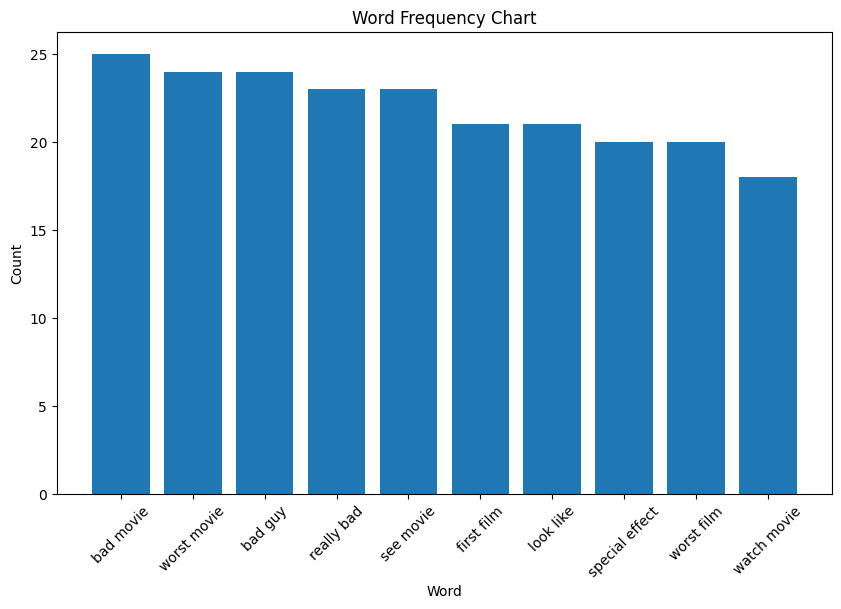

       sentiment                                             review  \
10805          0  The worst Wrestlemania ever.<br /><br />This h...   
20816          0  I had to compare two versions of Hamlet for my...   
16960          0  I was not entirely impressed by this film. It ...   
21952          0  Boy what a dud this mess was.But it only lasts...   
12116          0  This should have rocked. VH1 moved away from t...   

             feature     score  
10805  embedding_173  0.090282  
20816  embedding_173  0.079496  
16960  embedding_173  0.079282  
21952  embedding_173  0.078184  
12116  embedding_173  0.077044  


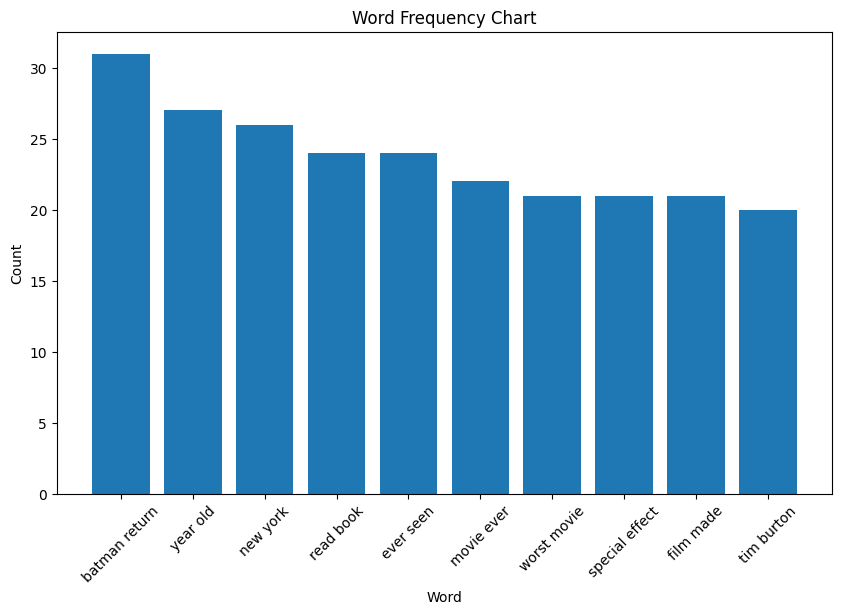

       sentiment                                             review  \
24129          0  I am appalled at how bad this film is. As a pa...   
22046          0  Thomas Archer (Ron Eldard) has his child kille...   
6445           0  It sounded so promising in the Rental Store, t...   
4396           0  This Film Was One Of The Worst Films I Have Ev...   
17127          0  I don't really know where to start. The acting...   

             feature     score  
24129  embedding_574  0.089422  
22046  embedding_574  0.081909  
6445   embedding_574  0.081206  
4396   embedding_574  0.080491  
17127  embedding_574  0.079933  


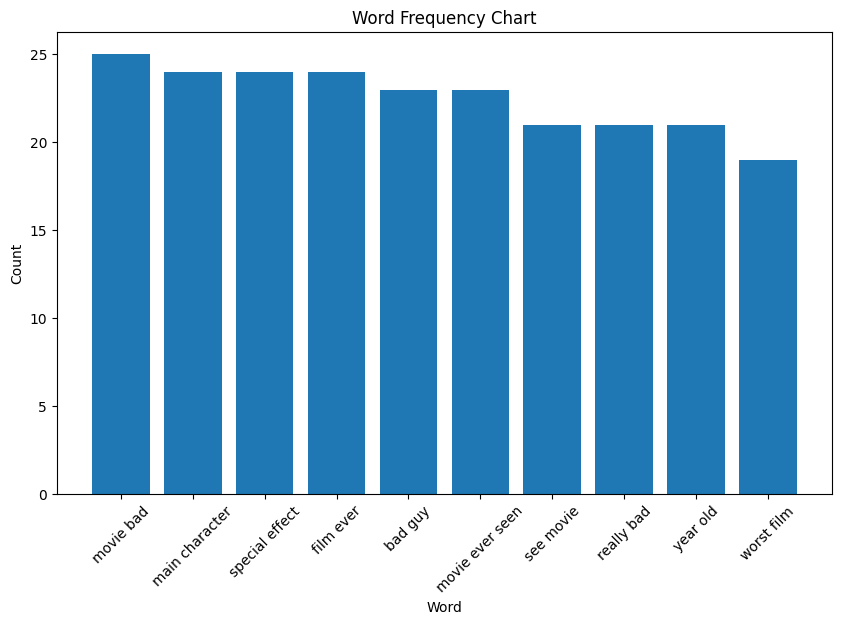

       sentiment                                             review  \
23506          0  This movie is one of the most wildly distorted...   
14043          0  Apparently, the people that wrote the back of ...   
23491          0  Considering its popularity, I found this movie...   
17147          0  This has to be, by far, the absolute worst mov...   
14025          0  This film is about British prisoners of war fr...   

             feature     score  
23506  embedding_138  0.091269  
14043  embedding_138  0.090897  
23491  embedding_138  0.090426  
17147  embedding_138  0.085330  
14025  embedding_138  0.085064  


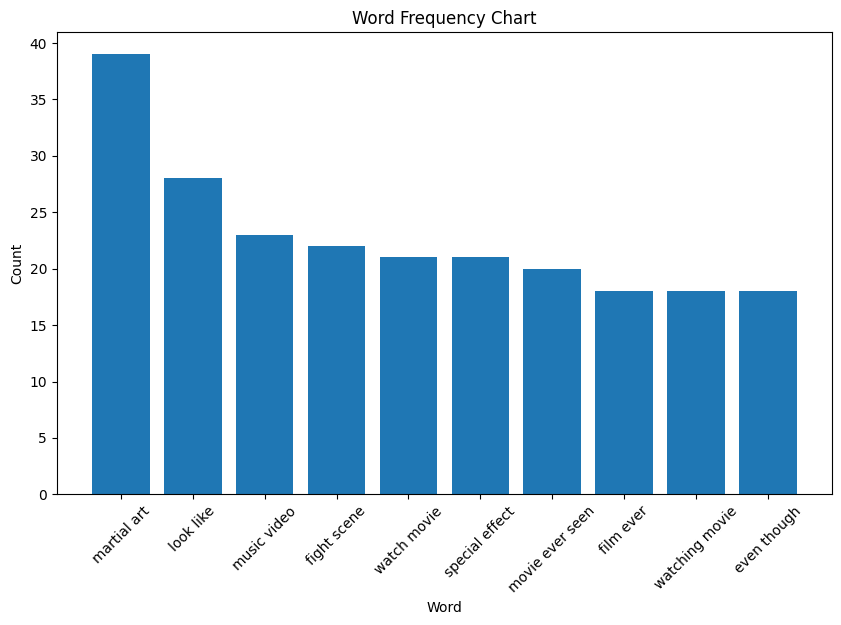

       sentiment                                             review  \
22648          0  TV movie about an ancient Egyptian curse broug...   
13542          0  This has to be one of the worst films I have e...   
10655          0  This movie is just as bad as it gets. If you l...   
19152          0  This film is really unbelievable. I've seen so...   
12511          0  Legendary Cameron Mitchell turkey about an act...   

             feature     score  
22648  embedding_577  0.116870  
13542  embedding_577  0.099320  
10655  embedding_577  0.096510  
19152  embedding_577  0.095682  
12511  embedding_577  0.095441  


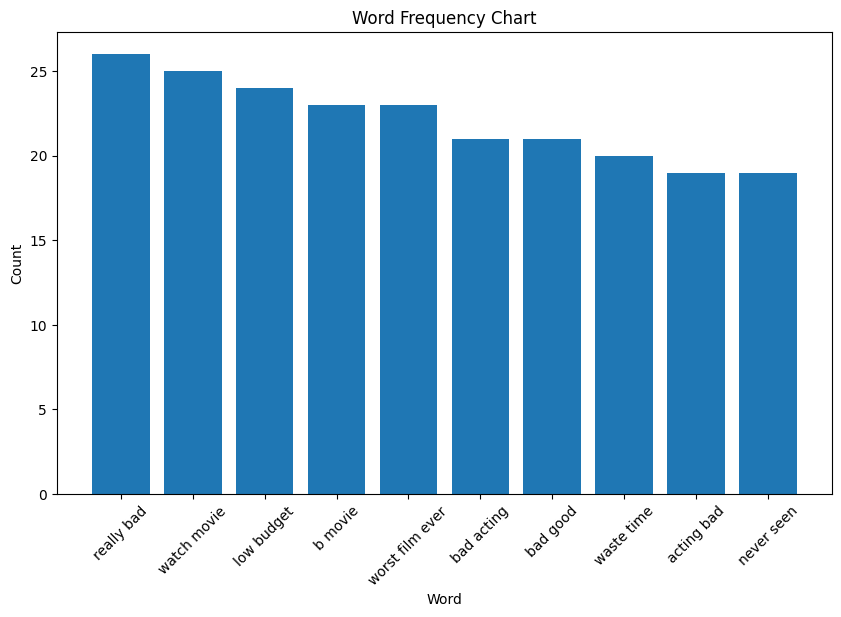

       sentiment                                             review  \
1232           0  I mistakenly thought that this neo-noir effort...   
2280           0  All that talent.....but when ya have poor dire...   
24863          0  I have no clue as to what this was shot on but...   
7266           0  There's really not a whole lot to say about th...   
16447          0  To call this anything at all would be an insul...   

             feature     score  
1232   embedding_128  0.116940  
2280   embedding_128  0.110844  
24863  embedding_128  0.102338  
7266   embedding_128  0.101910  
16447  embedding_128  0.101411  


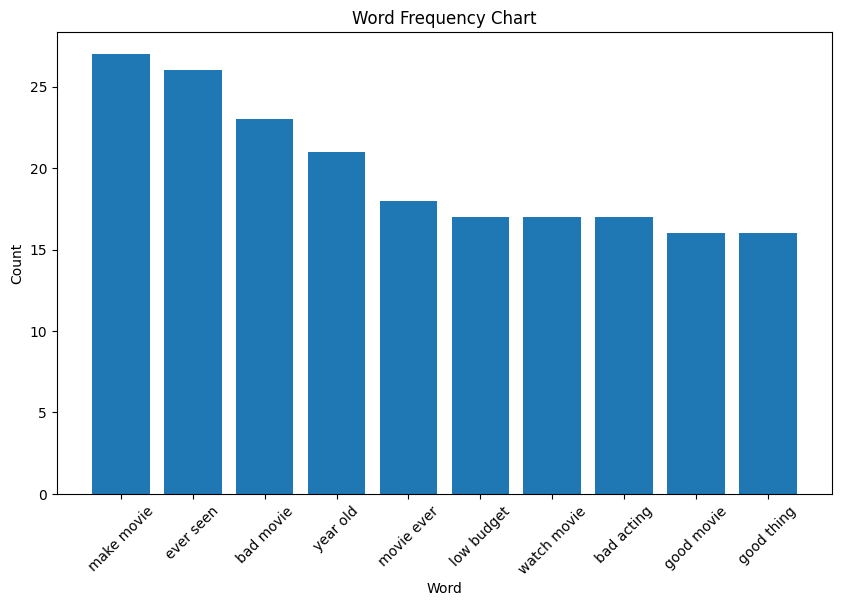

       sentiment                                             review  \
18601          0  I went to see the Omega Code with a group of o...   
4542           0  Rented this tonite from my local video store. ...   
4448           0  An interesting premise, and Billy Drago is alw...   
15363          0  This was a big disappointment for me. I think ...   
23689          0  This movie really deserves the MST3K treatment...   

             feature     score  
18601  embedding_557  0.080388  
4542   embedding_557  0.079741  
4448   embedding_557  0.079520  
15363  embedding_557  0.077120  
23689  embedding_557  0.076239  


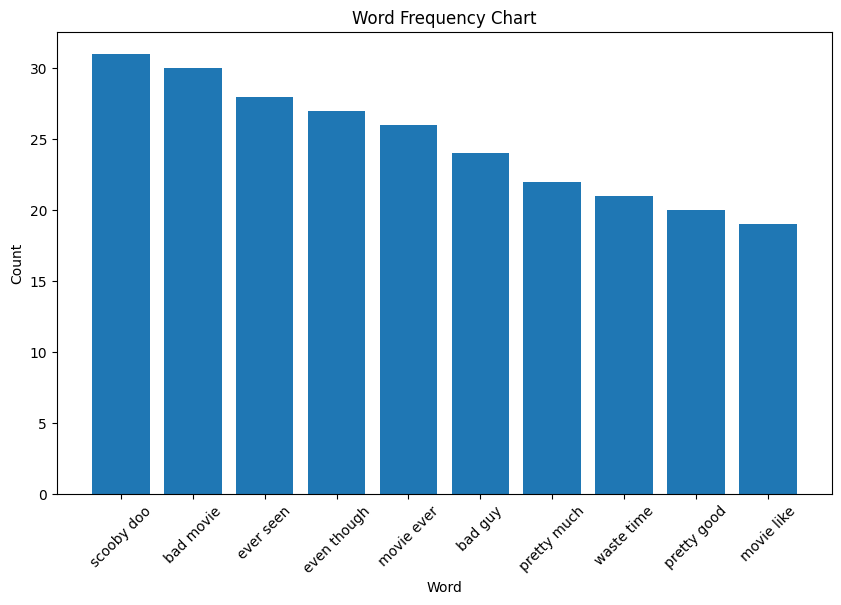

       sentiment                                             review  \
16095          0  Four porn stars romping through the Irish wood...   
12982          0  they have sex with melons in Asia.<br /><br />...   
11565          0  There are no spoilers for this film as nothing...   
24127          0  \Horrible People\" ought to be the subtitle of...   
11882          0  Tom & Jerry are visiting Africa and disguise t...   

             feature     score  
16095  embedding_182  0.129107  
12982  embedding_182  0.119059  
11565  embedding_182  0.118129  
24127  embedding_182  0.112889  
11882  embedding_182  0.112063  


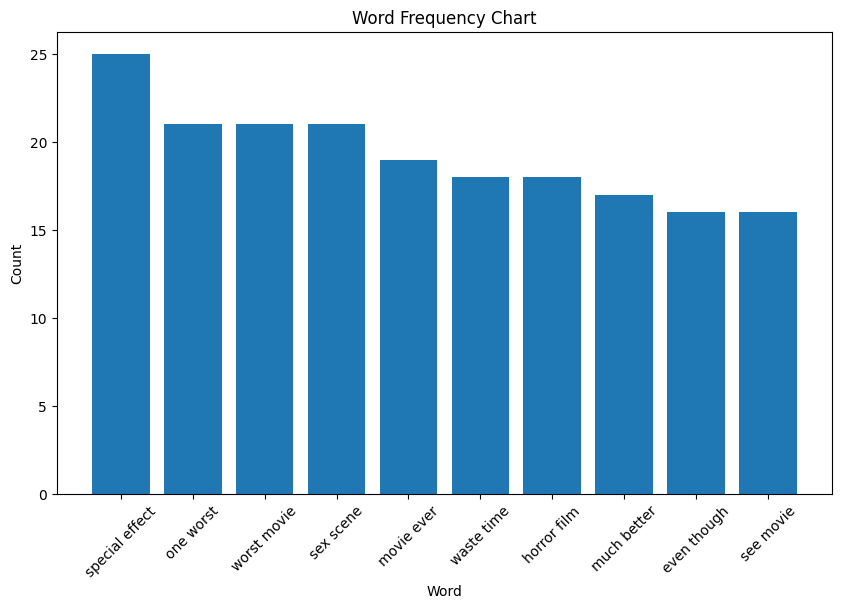

       sentiment                                             review  \
16063          0  Wow...OK. So, after reading the little feud on...   
8340           0  I have NEVER fallen asleep whilst watching a m...   
2272           0  Prince of Central Park (2000) is so utterly ba...   
24568          0  At first look of the plot tagline I figured it...   
21331          0  What is this?! Is it a comedy, a horror movie ...   

              feature     score  
16063  embedding_1206  0.091500  
8340   embedding_1206  0.086316  
2272   embedding_1206  0.083475  
24568  embedding_1206  0.081705  
21331  embedding_1206  0.079709  


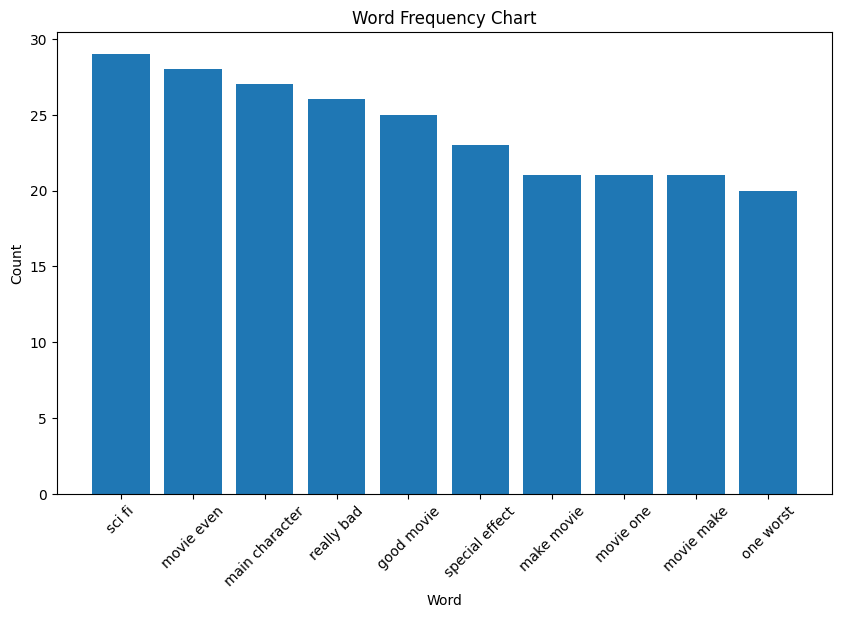

       sentiment                                             review  \
11582          0  when i watched this crap, it reminded me of th...   
13965          0  Beating the bad guys... Again is the tag line ...   
18064          0  96 minutes of this is cruel..and I love the ol...   
18790          0  \Loonatics Unleashed \" is the worst thing tha...   
9223           0  Avoid this one! It is a terrible movie. So wha...   

             feature     score  
11582  embedding_127  0.122675  
13965  embedding_127  0.122337  
18064  embedding_127  0.121705  
18790  embedding_127  0.121544  
9223   embedding_127  0.121259  


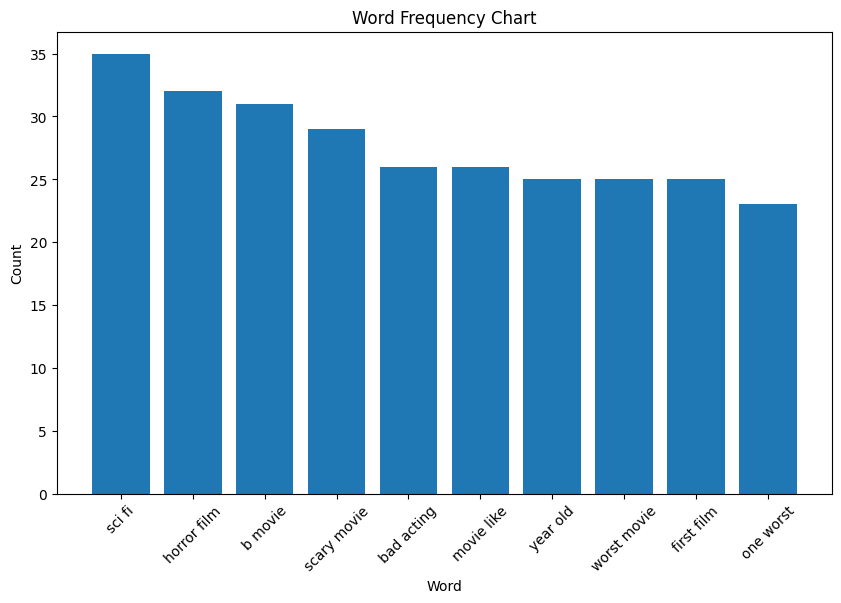

       sentiment                                             review  \
15650          0  I've seen some very terrible horror movies in ...   
21320          0  PROS: Akshay Kumar's performance(is it just me...   
20164          0  Priyadarshan's HERA PHERI was a nice situation...   
2380           0  I understand that the budget was low on this f...   
8634           0  \Go Fish\" garnered Rose Troche rightly or wro...   

              feature     score  
15650  embedding_1372  0.079256  
21320  embedding_1372  0.079064  
20164  embedding_1372  0.078862  
2380   embedding_1372  0.078087  
8634   embedding_1372  0.077662  


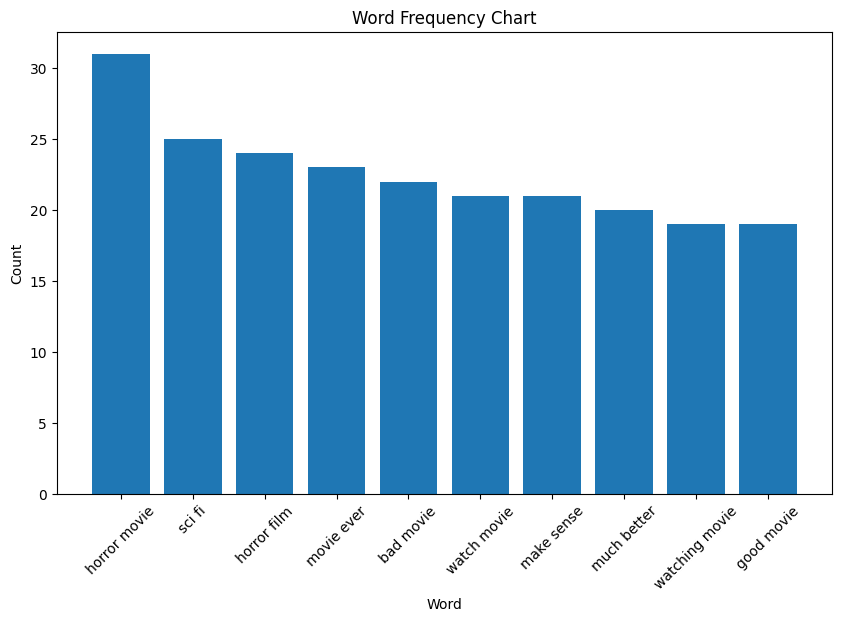

       sentiment                                             review  \
9828           0  This television show, is a idiotic waste of ti...   
14400          0  Horrible waste of time - bad acting, plot, dir...   
22722          0  When I decided to watch THE BARBARIANS, starri...   
18731          0  I hated this movie. It was absolutely horrible...   
10239          0  this is the worst movie ive ever seen. And i h...   

              feature     score  
9828   embedding_1258  0.091573  
14400  embedding_1258  0.088542  
22722  embedding_1258  0.086134  
18731  embedding_1258  0.085010  
10239  embedding_1258  0.082180  


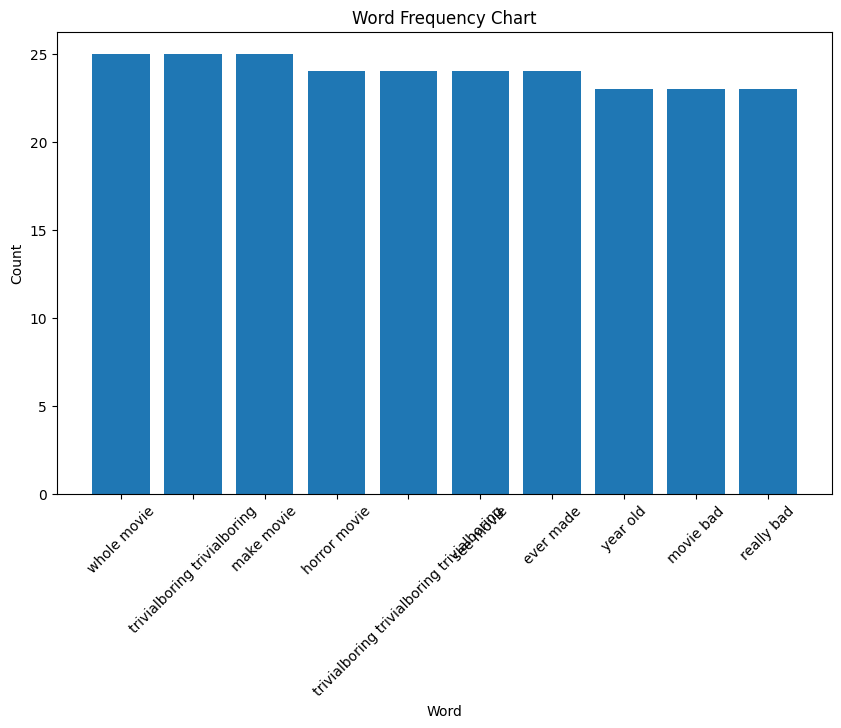

In [ ]:
selected_feature_important_list = sample_out_put['feature'].unique().tolist()
for index, feature in enumerate(selected_feature_important_list):
  df = sample_word_freq[sample_word_freq['feature']==feature].sort_values(by='count', ascending=False)[['word','count']].head(10)
  print(sample_out_put[sample_out_put['feature']==feature])
  plt.figure(figsize=(10, 6))
  plt.bar(df["word"], df["count"])
  plt.title("Word Frequency Chart")
  plt.xlabel("Word")
  plt.ylabel("Count")
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

# **====================== code archive =========================**

In [ ]:
pip install wordcloud matplotlib pillow

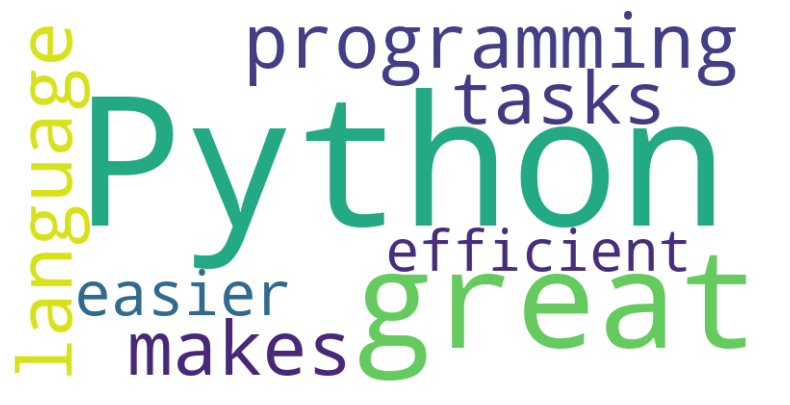

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text
text = "Python is a great programming language. Python makes tasks easier and efficient."

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

##Libraries And Packages


In [ ]:
# Removing HTML Markup: The BeautifulSoup Package
!pip install BeautifulSoup4


##Data Cleaning and Text Preprocessing
- Removing HTML Markup: The BeautifulSoup Package
- Frequently occurring words that don't carry much meaning. Such words are called "stop words".

In [ ]:

nltk.download('stopwords')  # Download text data sets, including stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text()
    #
    # 2. Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))
    #
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 6. Join the words back into one string separated by space,
    # and return the result.

    return( " ".join( meaningful_words ))

# Loop through and clean all of the training set at once

In [ ]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["review"].size
print("Cleaning and parsing the training set movie reviews...\n")
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []
for i in range( 0, num_reviews ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews ))
    clean_train_reviews.append( review_to_words( train["review"][i] ))

Cleaning and parsing the training set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [ ]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000,
                             ngram_range=(1, 4),            # Use 1- to 4-grams
                             min_df=0.001,                       # Minimum term frequency
                             max_df=0.5,                      # Maximum document frequency
                             token_pattern=r"\b[\w+|']+\b") # Use word tokenizer: See Ethan's comment below

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [ ]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names_out()
print(vocab)

['aaron' 'abandoned' 'abc' ... 'zombie' 'zombies' 'zone']


In [ ]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

Streaming output truncated to the last 5000 lines.
103 aaron
188 abandoned
99 abc
132 abilities
465 ability
1338 able
113 absence
106 absent
361 absolute
1507 absolutely
158 absolutely nothing
279 absurd
211 abuse
285 academy
122 academy award
465 accent
206 accents
302 accept
146 acceptable
157 accepted
349 accident
190 accidentally
117 accomplished
293 according
188 account
284 accurate
120 accused
185 achieve
150 achieved
117 achievement
1019 across
1234 act
125 act like
657 acted
6526 acting
216 acting bad
166 acting good
114 acting great
3242 action
131 action film
194 action movie
227 action scenes
162 action sequences
332 actions
2370 actor
4452 actors
115 actors actresses
1154 actress
356 actresses
359 acts
760 actual
4301 actually
174 ad
288 adam
432 adaptation
150 adapted
844 add
441 added
162 adding
305 addition
355 adds
106 adequate
122 admire
599 admit
121 admittedly
100 adorable
505 adult
363 adults
100 advance
159 advantage
476 adventure
194 adventures
271 advice
98 advi

In [ ]:
print("Training the random forest...")

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)

# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train["sentiment"] )

Training the random forest...


In [ ]:
# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = []

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    if( (i+1) % 1000 == 0 ):
        print("Review %d of %d\n" % (i+1, num_reviews))
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()






Cleaning and parsing the test set movie reviews...

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [ ]:
def highlight_important_words(review, important_words, output_path):
    """
    Highlights the important words in the original review by wrapping them in HTML span tags.
    """
    from bs4 import BeautifulSoup, NavigableString
    import re

    # Parse the HTML content
    soup = BeautifulSoup(review, "html.parser")

    # Compile regex patterns for all important words
    patterns = {word: re.compile(r'\b{}\b'.format(re.escape(word)), re.IGNORECASE) for word in important_words}

    # Function to recursively traverse and highlight words in text nodes
    def recursive_highlight(element):
        for content in element.contents:
            if isinstance(content, NavigableString):
                new_content = str(content)
                for word, pattern in patterns.items():
                    # Replace matched words with highlighted span
                    new_content = pattern.sub(
                        lambda match: f"<span style='background-color: yellow'>{match.group(0)}</span>",
                        new_content
                    )
                # Replace the old text with the new highlighted text
                if new_content != content:
                    new_fragment = BeautifulSoup(new_content, "html.parser")
                    content.replace_with(new_fragment)
            elif content.name is not None:
                # Recursively process child elements
                recursive_highlight(content)

    # Start the recursive highlighting from the root
    recursive_highlight(soup)

    # Save the highlighted review to an HTML file
    with open(output_path, 'w', encoding='utf-8') as file:
        file.write(str(soup))

def interpret_model(model, vectorizer, test_data_features, test_reviews, y_test, DATA_DIR):
    """
    Interpret model predictions for 5 positive and 5 negative reviews using feature importance.
    """
    # Select 5 positive and 5 negative reviews
    np.random.seed(42)  # For reproducibility
    positive_indices = np.where(y_test == 1)[0]
    negative_indices = np.where(y_test == 0)[0]

    selected_positive = np.random.choice(positive_indices, size=5, replace=False)
    selected_negative = np.random.choice(negative_indices, size=5, replace=False)
    selected_indices = np.concatenate([selected_positive, selected_negative])

    selected_reviews = test_reviews.iloc[selected_indices].reset_index(drop=True)
    selected_features = test_data_features[selected_indices]
    selected_labels = y_test.iloc[selected_indices].reset_index(drop=True)

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Create directory to save interpretability plots and highlighted reviews
    plots_dir = os.path.join(DATA_DIR, 'interpretability_plots')
    os.makedirs(plots_dir, exist_ok=True)
    highlighted_dir = os.path.join(plots_dir, 'highlighted_reviews')
    os.makedirs(highlighted_dir, exist_ok=True)

    # For Random Forest, we can use feature importances
    if isinstance(model, RandomForestClassifier):
        # Get feature importances
        importances = model.feature_importances_
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False)

        # Plot top 20 most important features
        plt.figure(figsize=(12, 6))
        sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
        plt.title('Top 20 Most Important Features')
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, 'feature_importance.png'))
        plt.close()

    # Analyze individual reviews
    for i in range(len(selected_reviews)):
        review = selected_reviews.iloc[i]
        label = selected_labels.iloc[i]
        features = selected_features[i]

        # Get the words present in this review
        words_present = features > 0
        words = feature_names[words_present]

        if isinstance(model, RandomForestClassifier):
            word_importance = importances[words_present]
            review_words_importance = pd.DataFrame({
                'word': words,
                'importance': word_importance
            }).sort_values('importance', ascending=False)

            # Get top 10 important words
            top_words = review_words_importance.head(10)['word'].tolist()

            # Save top words and their importance for this review
            filename_txt = f'review_{i+1}_{"positive" if label ==1 else "negative"}.txt'
            filepath_txt = os.path.join(plots_dir, filename_txt)

            with open(filepath_txt, 'w') as f:
                f.write(f"Review {i+1} - {'Positive' if label ==1 else 'Negative'} Sentiment\n")
                f.write(f"Original review:\n{review}\n\n")
                f.write("Top contributing words:\n")
                for _, row in review_words_importance.head(10).iterrows():
                    f.write(f"{row['word']}: {row['importance']:.4f}\n")

            # Highlight important words in the original review
            filename_html = f'review_{i+1}_{"positive" if label ==1 else "negative"}_highlighted.html'
            filepath_html = os.path.join(highlighted_dir, filename_html)
            highlight_important_words(review, top_words, filepath_html)

            print(f"\nReview {i+1} - {'Positive' if label ==1 else 'Negative'} Sentiment")
            print(f"Analysis saved to {filepath_txt}")
            print(f"Highlighted review saved to {filepath_html}")

    print(f"\nInterpretability visualizations saved in the directory: {plots_dir}")
    print(f"Highlighted reviews saved in the directory: {highlighted_dir}")

def main():
    warnings.filterwarnings('ignore')
    nltk.download('stopwords')

    DATA_DIR = 'p3_data'
    num_splits = 5

    # Part 1: Logistic Regression on Multiple Splits
    for i in range(num_splits):
        train_path = os.path.join(DATA_DIR, f"split_{i+1}", "train.csv")
        test_path = os.path.join(DATA_DIR, f"split_{i+1}", "test.csv")
        test_y_path = os.path.join(DATA_DIR, f"split_{i+1}", "test_y.csv")

        train = pd.read_csv(train_path)
        test = pd.read_csv(test_path)
        y_test = pd.read_csv(test_y_path)['sentiment']

        X_train = train.drop(columns=['id', 'sentiment', 'review'])
        y_train = train['sentiment']
        X_test = test.drop(columns=['id', 'review'])

        model = train_logistic(X_train, y_train)
        y_pred_proba = predict(model, X_test)
        auc_baseline = roc_auc_score(y_train, y_pred_proba)
        print(f"Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.3f}")

        submission = pd.DataFrame({
            'id': test['id'],
            'prob': y_pred_proba
        })
        submission.to_csv(os.path.join(DATA_DIR, f"split_{i+1}", "mysubmission.csv"), index=False)

        test_auc_score = roc_auc_score(y_test, y_pred_proba)
        print(f"Best AUC Score on Test Data in split {i+1}: {test_auc_score:.3f}")

    # Part 2: Random Forest with Bag of Words on Split 1
    split = 1
    train_path = os.path.join(DATA_DIR, f"split_{split}", "train.csv")
    test_path = os.path.join(DATA_DIR, f"split_{split}", "test.csv")

    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)

    stops = set(stopwords.words("english"))

    clean_train_reviews = []
    num_train_reviews = train["review"].size
    print("\nCleaning and parsing the training set movie reviews...\n")
    for i in range(num_train_reviews):
        if (i+1) % 1000 == 0:
            print(f"Review {i+1} of {num_train_reviews}")
        clean_train_reviews.append(review_to_words(train["review"][i], stops))

    print("\nCreating the bag of words...\n")
    vectorizer = CountVectorizer(
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=None,
        max_features=5000,
        ngram_range=(1, 4),
        min_df=0.001,
        max_df=0.5,
        token_pattern=r"\b[\w+|']+\b"
    )

    train_data_features = vectorizer.fit_transform(clean_train_reviews)
    train_data_features = train_data_features.toarray()

    vocab = vectorizer.get_feature_names_out()
    print("\nVocabulary:")
    print(vocab)

    dist = np.sum(train_data_features, axis=0)
    print("\nWord Counts:")
    for tag, count in zip(vocab, dist):
        print(f"{count} {tag}")

    print("\nTraining the random forest...")
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(train_data_features, train["sentiment"])

    clean_test_reviews = []
    num_test_reviews = len(test["review"])
    print("\nCleaning and parsing the test set movie reviews...\n")
    for i in range(num_test_reviews):
        if (i+1) % 1000 == 0:
            print(f"Review {i+1} of {num_test_reviews}")
        clean_review = review_to_words(test["review"][i], stops)
        clean_test_reviews.append(clean_review)

    test_data_features = vectorizer.transform(clean_test_reviews)
    test_data_features = test_data_features.toarray()

    # Make predictions with the Random Forest
    y_pred_forest = forest.predict_proba(test_data_features)[:, 1]
    submission_forest = pd.DataFrame({
        'id': test['id'],
        'prob': y_pred_forest
    })
    submission_forest.to_csv(os.path.join(DATA_DIR, f"split_{split}", "forest_submission.csv"), index=False)
    print(f"\nRandom Forest predictions saved for split {split}.")

    # Interpretability analysis on Split 1 Random Forest
    print("\nStarting interpretability analysis...\n")
    y_test_split1 = pd.read_csv(os.path.join(DATA_DIR, f"split_{split}", "test_y.csv"))['sentiment']
    interpret_model(
        model=forest,
        vectorizer=vectorizer,
        test_data_features=test_data_features,
        test_reviews=test['review'],
        y_test=y_test_split1,
        DATA_DIR=os.path.join(DATA_DIR, f"split_{split}")
    )


=============================================== CODE ARCHIVE ===================================

In [ ]:
l1_ratio_space = np.linspace(0, 1, 10)
for l1_ratio in l1_ratio_space:
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        l1_ratio=l1_ratio,
        C=5
    )
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    auc_score = roc_auc_score(y_train, y_pred_proba)
    print(f"l1_ratio = {l1_ratio} Baseline Logistic Regression AUC in split {i+1}: {auc_baseline:.3f}")